<a href="https://colab.research.google.com/github/sarvesh2000/ezfinup/blob/vaishnav/Algo_Trading_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
plt.style.use('fivethirtyeight')

In [13]:
stock = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/EZFINUP/Algo Trading/AAPL.csv")
stock

,Date,Open,High,Low,Close,Adj Close,Volume
0,2020-01-14,79.175003,79.392502,78.042503,78.169998,77.500702,161954400
1,2020-01-15,77.962502,78.875000,77.387497,77.834999,77.168564,121923600
2,2020-01-16,78.397499,78.925003,78.022499,78.809998,78.135223,108829200
3,2020-01-17,79.067497,79.684998,78.750000,79.682503,79.000244,137816400
4,2020-01-21,79.297501,79.754997,79.000000,79.142502,78.464882,110843200
...,...,...,...,...,...,...,...
248,2021-01-07,128.360001,131.630005,127.860001,130.919998,130.919998,109578200
249,2021-01-08,132.429993,132.630005,130.229996,132.050003,132.050003,105158200
250,2021-01-11,129.190002,130.169998,128.500000,128.979996,128.979996,100620900
251,2021-01-12,128.500000,129.690002,126.860001,128.800003,128.800003,91951100


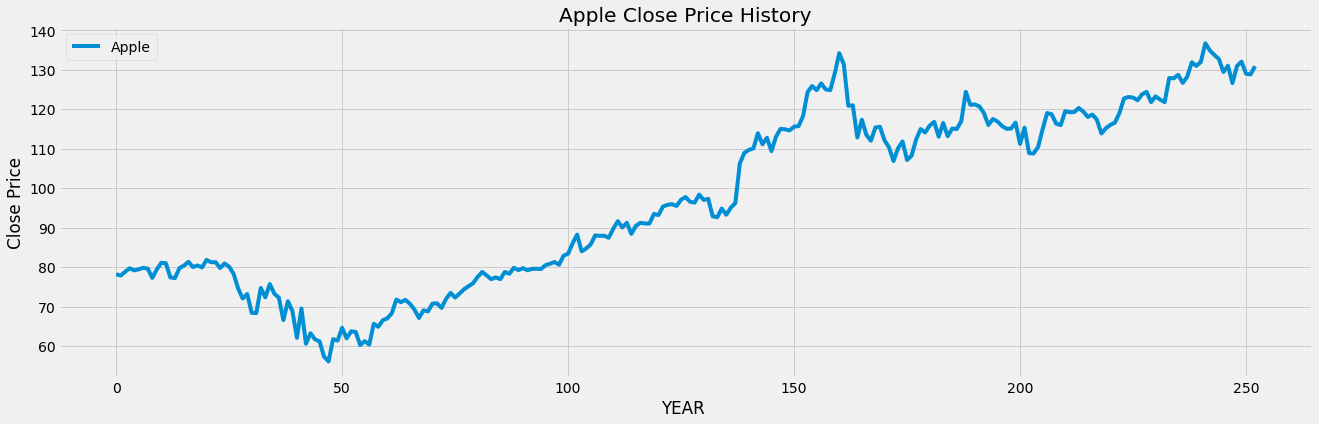

In [14]:


#Visualize the Data
plt.figure(figsize=(20,6))
plt.plot(stock['Close'],label = 'Apple')
plt.title('Apple Close Price History')
plt.xlabel('YEAR ')
plt.ylabel('Close Price')
plt.legend(loc='upper left')
plt.show()

In [61]:
Sma30=pd.DataFrame()
Sma30['Prev Close Price']=stock['Close'].rolling(window=10).mean()

#Creating Simple Moving Average with 100-day Window
Sma100=pd.DataFrame()
Sma100['Prev Close Price']=stock['Close'].rolling(window=60).mean()

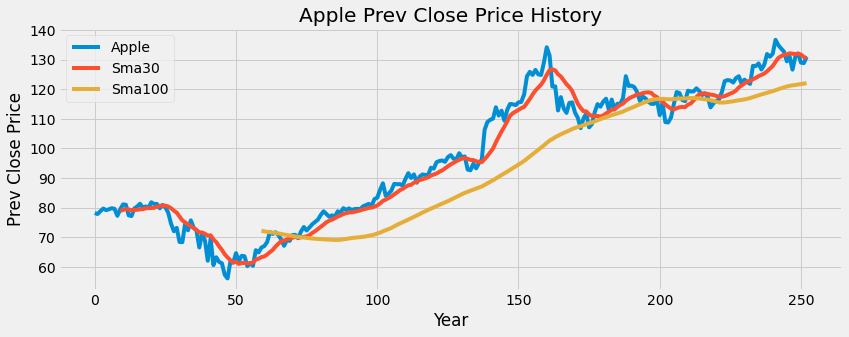

In [62]:
#Visualize to compare
plt.figure(figsize=(12.5,4.5))
plt.plot(stock['Close'],label = 'Apple')
plt.plot(Sma30['Prev Close Price'],label = 'Sma30')
plt.plot(Sma100['Prev Close Price'],label = 'Sma100')
plt.title('Apple Prev Close Price History')
plt.xlabel('Year')
plt.ylabel('Prev Close Price')
plt.legend(loc='upper left')
plt.show()

In [63]:
data=pd.DataFrame()
data['stock']=stock['Close']
data['Sma30']=Sma30['Prev Close Price']
data['Sma100']=Sma100['Prev Close Price']

In [64]:
def buy_sell(data):
  sigPriceBuy=[]
  sigPriceSell=[]
  flag=-1


  for i in range(len(data)):
    if data['Sma30'][i]>data['Sma100'][i]:
      if flag != 1:
        sigPriceBuy.append(data['stock'][i])
        sigPriceSell.append(np.nan)
        flag=1
      else:
        sigPriceBuy.append(np.nan)
        sigPriceSell.append(np.nan)
    elif data['Sma30'][i]<data['Sma100'][i]:
      if flag != 0 :
        sigPriceBuy.append(np.nan)
        sigPriceSell.append(data['stock'][i])
        flag = 0
      else:
        sigPriceBuy.append(np.nan)
        sigPriceSell.append(np.nan)
    else:
      sigPriceBuy.append(np.nan)
      sigPriceSell.append(np.nan)


  return(sigPriceBuy,sigPriceSell)

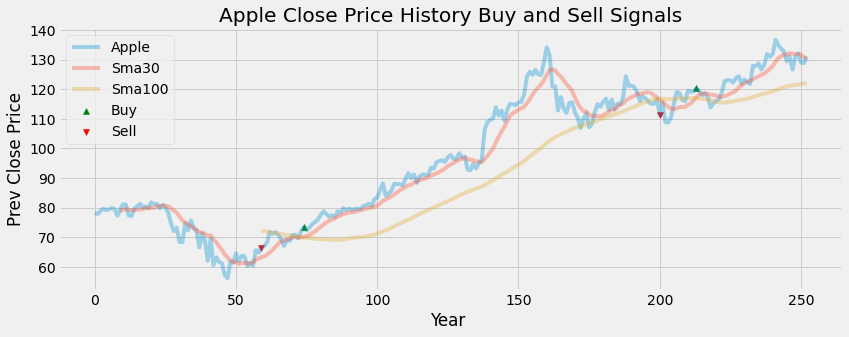

In [65]:
buy_sell = buy_sell(data)
data['Buy_Signal_Price']=buy_sell[0]
data['Sell_Signal_Price']=buy_sell[1]

#Visualize the Data
plt.figure(figsize=(12.5,4.5))
plt.plot(stock['Close'],label = 'Apple',alpha=0.35)
plt.plot(Sma30['Prev Close Price'],label = 'Sma30' ,alpha=0.35)
plt.plot(Sma100['Prev Close Price'],label = 'Sma100' ,alpha=0.35)
plt.scatter(data.index,data['Buy_Signal_Price'],label='Buy',marker='^',color='green')
plt.scatter(data.index,data['Sell_Signal_Price'],label='Sell',marker='v',color='red')
plt.title('Apple Close Price History Buy and Sell Signals')
plt.xlabel('Year ')
plt.ylabel('Prev Close Price')
plt.legend(loc='upper left')
plt.show()